<a href="https://colab.research.google.com/github/wantwotree23/claims-analysis/blob/main/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_header = pd.read_csv('STONYBRK_20240531_HEADER.csv')
df_line = pd.read_csv('STONYBRK_20240531_LINE.csv')
df_code = pd.read_csv('STONYBRK_20240531_CODE.csv')

# Part 1

## Header csv

In [4]:
print(f"Shape: {df_header.shape}")
print(f"\nFirst 5 row:")
print(df_header.head(5))
print(f"\nColumn names and types:")
print(df_header.dtypes)
print(f"\nMissing values:")
print(df_header.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_header.describe)

Shape: (388, 43)

First 5 row:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2

## Line csv

In [5]:
print(f"Shape: {df_line.shape}")
print(f"\nFirst 5 rows:")
print(df_line.head(5))
print(f"\nColumn names and thpes")
print(df_line.dtypes)
print(f"\nMissing values:")
print(df_line.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_line.describe)

Shape: (520, 28)

First 5 rows:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier 

## Code

In [184]:
print(f"Shape: {df_code.shape}")
print(f"\nFirst 5 rows:")
print(df_code.head(5))
print(f"\nColumn names and thpes")
print(df_code.dtypes)
print(f"\nMissing values:")
print(df_code.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_code.describe)

Shape: (1536, 9)

First 5 rows:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  

Column names and thpes
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd 

## Observation

In [183]:
# 1. How many unique claims?
unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"Number of unique claims: {unique_claims}")

# 2. Date range of claims (convert to datetime first)
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])

print(f"\nDate range:")
print(f"  Earliest service date: {df_header['ServiceFromDate'].min()}")
print(f"  Latest service date: {df_header['ServiceToDate'].max()}")

# 3. Average service lines per claim
lines_per_claim = df_line.groupby('ProspectiveClaimId').size().mean()
print(f"\nAverage service lines per claim: {lines_per_claim:.2f}")

# 4. Average diagnosis codes per claim
dx_per_claim = df_code.groupby('ProspectiveClaimId').size().mean()
print(f"\nAverage diagnosis codes per claim: {dx_per_claim:.2f}")

Number of unique claims: 388

Date range:
  Earliest service date: 2023-09-25 00:00:00
  Latest service date: 2024-05-29 00:00:00

Average service lines per claim: 1.34

Average diagnosis codes per claim: 3.96


# Part 2

## Question 1

                          ProviderName  BillingProviderNPI  ClaimCount
5                        SB INTERNISTS          1821035601         152
0               SB SURGICAL ASSOCIATES          1063468536          81
2     NEW YORK SPINE AND BRAIN SURGERY          1154376309          69
4  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          1538114723          40
3            SB PSYCHIATRIC ASSOCIATES          1437105905          36


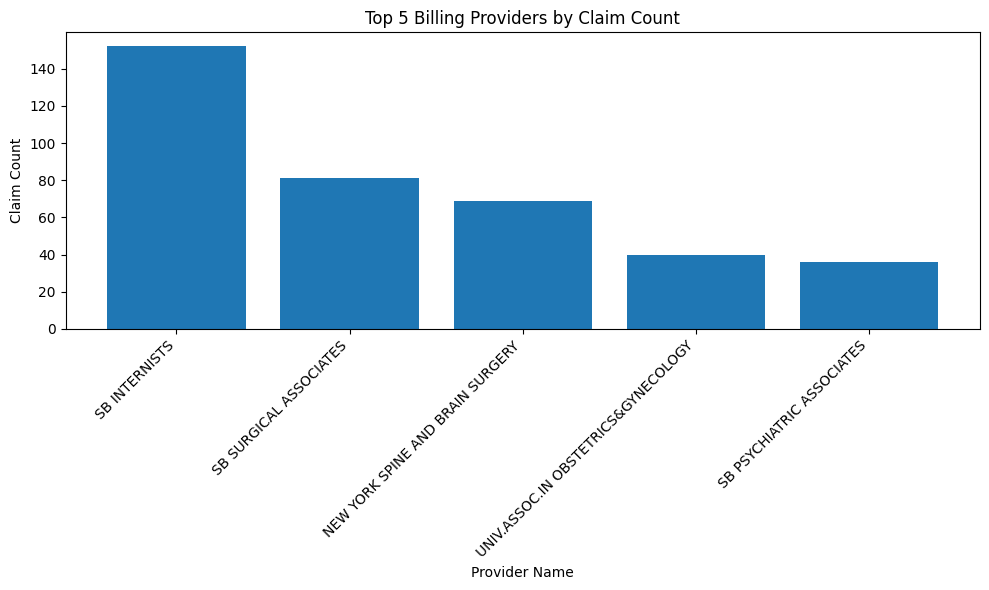

In [178]:
# This groups the wanted columns and creates a count based on the billing provider. Then it sorts the top 5 billing providers.
provider_counts = df_header.groupby(['BillingProviderNPI', 'BillingProvFirstName']).size().reset_index(name='ClaimCount')
provider_counts = provider_counts.sort_values('ClaimCount', ascending=False).head(5)

# Rename billing first name to provider name
provider_counts['ProviderName'] = provider_counts['BillingProvFirstName']

# Print the top 5 results
print(provider_counts[['ProviderName', 'BillingProviderNPI', 'ClaimCount']])

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(provider_counts['ProviderName'], provider_counts['ClaimCount'])
plt.xlabel('Provider Name')
plt.ylabel('Claim Count')
plt.title('Top 5 Billing Providers by Claim Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 2

The top 5 primary payers by claim volume
PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64
             PrimaryPayerName  ClaimCount  Percentage
0                    MEDICARE         242       62.37
1             HEALTHFIRST FFS          46       11.86
2  FIDELIS/BETTER HEALTH PLAN          26        6.70
3                HIP MEDICAID          17        4.38
4       HEALTHFIRST CAPITATED          10        2.58


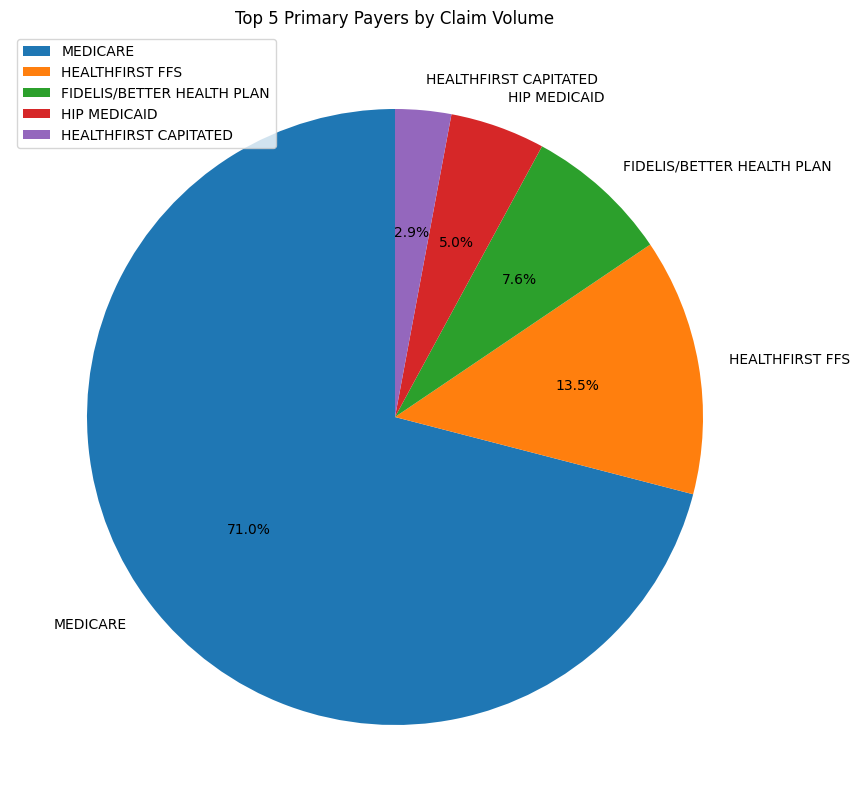

In [179]:
# Find the top 5 primary payers by claim volume
payer_volume = df_header['PrimaryPayerName'].value_counts().head(5)
print(f"The top 5 primary payers by claim volume")
print(payer_volume)

# Calculate percentage of total claims for each payer
total_claims = len(df_header)
payer_percentages = (payer_volume / total_claims * 100).round(2)

# Creates a dataframe to show the data
payer_df = pd.DataFrame({
    'PrimaryPayerName': payer_volume.index,
    'ClaimCount': payer_volume.values,
    'Percentage': payer_percentages.values
})

print(payer_df)

# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(payer_df['Percentage'],
        labels=payer_df['PrimaryPayerName'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Top 5 Primary Payers by Claim Volume')
plt.legend()
plt.show()

## Question 3

In [180]:
# Finds the top 10 codes based on frequency
top_diag = df_code['CodeValue'].value_counts().head(10)

# Create dataframe to display the data
df_diag = pd.DataFrame({
    'ICD-10 code': top_diag.index,
    'Frequency': top_diag.values
})

print(f"Top 10 diagnosis codes:")
print(df_diag)

Top 10 diagnosis codes:
  ICD-10 code  Frequency
0      J96.01         62
1         I10         49
2       E78.5         49
3       G93.5         34
4       D64.9         29
5      I25.10         27
6       I61.9         26
7      I48.91         24
8       I60.8         24
9       I50.9         22


## Question 4

Top 10 frequently billed HCPCS codes:
    HCPCS                                ClientProcedureName  Frequency
0   99291                  CRITICAL CARE, INITIAL FIRST HOUR         68
1   99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...         48
2   99233  SUBSEQ.HOSP.CARE DETAILED INTERVAL HX.,EXAM HI...         48
3   99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...         48
4   99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...         39
5   99213  OFFICE OR OUTPATIENT VISIT,ESTAB. PATIENT,EXPA...         39
6   99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATI...         39
7   99213  OFFICE OR OUTPAT.  VISIT  ESTABLISHED PAT.,EXP...         39
8   99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...         33
9   99223  INITIAL HOSP. CARE,COMPREHENSIVE HX,EX,HIGH CO...         33
10  99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...         32
11  99222  INIT. HOSPITAL  CARE,COMPREHENSIVE HX,EX,MODER...         32
12  99232  SUBS.HOSP.CARE 

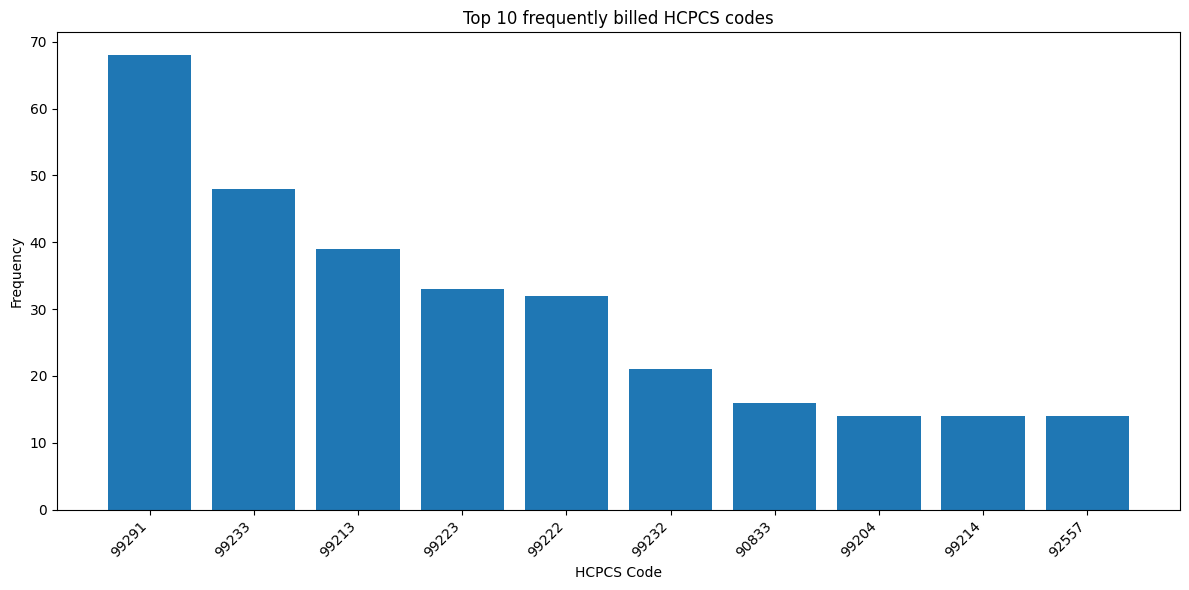

In [181]:
# Find the top 10 frequently billed HCPCS codes
top_hcpcs = df_line['HCPCS'].value_counts().head(10)

# Create dataframe to display data
df_hcpcs = pd.DataFrame({
    'HCPCS': top_hcpcs.index,
    'Frequency': top_hcpcs.values
})

# Avoid showing duplicate names
pro_name = df_line[['HCPCS','ClientProcedureName']].drop_duplicates()
# Merge the columns and display the 3 columns wanted
df_hcpcs = df_hcpcs.merge(pro_name, on='HCPCS', how='left')
df_hcpcs = df_hcpcs[['HCPCS', 'ClientProcedureName', 'Frequency']]

print(f"Top 10 frequently billed HCPCS codes:")
print(df_hcpcs)

# The result goes to 23 rows because there are multiple HCPCS codes that have the same description but written differently.

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_hcpcs['HCPCS'], df_hcpcs['Frequency'])
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.title('Top 10 frequently billed HCPCS codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 5

In [182]:
# Find counts for each place of service and create two columns showing the data
place_counts = df_header['PlaceOfService'].value_counts().reset_index()
place_counts.columns = ['PlaceOfService', 'ClaimCount']

print("Claims by Place of Service:")
print(place_counts.to_string(index=False))

# Find the total number of claims
total_claims = len(df_header)

# Find percentage of claims for each place of service
place_counts['Percentage'] = (place_counts['ClaimCount'] / total_claims * 100).round(2)

print("\nClaims with Percentages:")
print(place_counts)

# Match the facility location to the claim counts
facility_counts = df_header['Facility_Location'].value_counts().reset_index()
facility_counts.columns = ['Facility_Location', 'ClaimCount']
facility_counts['Percentage'] = (facility_counts['ClaimCount'] / total_claims * 100).round(2)

print("\nClaims by Facility Location:")
print(facility_counts)

Claims by Place of Service:
 PlaceOfService  ClaimCount
             21         231
             11         132
             22          24
             23           1

Claims with Percentages:
   PlaceOfService  ClaimCount  Percentage
0              21         231       59.54
1              11         132       34.02
2              22          24        6.19
3              23           1        0.26

Claims by Facility Location:
     Facility_Location  ClaimCount  Percentage
0            INPATIENT         231       59.54
1      DOCTOR'S OFFICE         132       34.02
2  OUTPATIENT HOSPITAL          14        3.61
3   AMBULATORY SURGERY          10        2.58
4            EMERGENCY           1        0.26


# Part 3

## Question 6

In [177]:
# Merge the csv and calculate the total number of service lines per claim
merged_data = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
lines_per_claim = merged_data.groupby('ProspectiveClaimId').size().reset_index(name='Number of lines')

print("\nService lines per claim:")
print(lines_per_claim)

# Identify claims with 5 or more service lines
high_line = lines_per_claim[lines_per_claim['Number of lines'] >= 5]
print(f"\nNumber of claims with 5+ service lines: {len(high_line)}")

# Merge back to get provider name and calculate total charges
# First, get total charges per claim from line csv and then get name from header csv
claim_charges = merged_data.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'BillingProvFirstName': 'first'
}).reset_index()

claim_charges.columns = ['ProspectiveClaimId', 'Total Charges', 'Provider name']

# Merge with high_line
high_line = high_line.merge(claim_charges, on='ProspectiveClaimId', how='left')

# Display: Claim Id, Provider name, number of lines, and total charges
print("\nClaims with 5 or more service lines:")
print(high_line[['ProspectiveClaimId', 'Provider name', 'Number of lines', 'Total Charges']])


Service lines per claim:
     ProspectiveClaimId  Number of lines
0              35216986                1
1              35235657                1
2              35244774                1
3              35249003                1
4              35249014                1
..                  ...              ...
383            36999799                3
384            37001070                4
385            37001295                3
386            37001309                3
387            37001489                2

[388 rows x 2 columns]

Number of claims with 5+ service lines: 5

Claims with 5 or more service lines:
   ProspectiveClaimId                        Provider name  Number of lines  \
0            36668119  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
1            36710175  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                5   
2            36740402  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
3            36757684  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY   

## Question 7

In [176]:
# Merge all 3 datasets
header_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
hl_code = header_line.merge(df_code, on='ProspectiveClaimId', how='inner')

# Filter out the wanted code
cpt_99291 = hl_code[hl_code['HCPCS'] == '99291']

# Do a count of all the diagnosis codes on cpt 99291 and display it in two columns
diag_count = cpt_99291['CodeValue'].value_counts().reset_index()
diag_count.columns = ['DiagnosisCode', 'Frequency']

# Show the top diagnosis code
top_diag = diag_count.iloc[0]
print(f"Most common diagnosis code: {top_diag['DiagnosisCode']}")

Most common diagnosis code: J96.01


## Question 8

In [175]:
# Merge header and line dataset
head_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Calculate total charges per claim
total_claim = header_line.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'PrimaryPayerName': 'first'
}).reset_index()

# Rename columns
total_claim.columns = ['Claim ID', 'Total charges', 'Payer name']
print(total_claim)

# Group by payer name and calculate the charges and claim
payer_stats = total_claim.groupby('Payer name').agg({
    'Total charges': 'sum',
    'Claim ID': 'count'
}).reset_index()

# Rename the columns
payer_stats.columns = ['Payer name', 'Total charges', 'Number of claims']

# Find the averages
payer_stats['Average charges'] = (payer_stats['Total charges'] / payer_stats['Number of claims']).round(2)

# Sort the payers by total charges descending
payer_stats = payer_stats.sort_values('Total charges', ascending=False)

print("\nTop 10 Payers by Total Charges:")
print(payer_stats.head(10))

     Claim ID  Total charges                          Payer name
0    35216986           1155                               AETNA
1    35235657           1155                               AETNA
2    35244774           1155                               AETNA
3    35249003           1155  UNITED COMMUNITY PLAN GOVT PROGRAM
4    35249014           1155                                MMIS
..        ...            ...                                 ...
383  36999799            855                            MEDICARE
384  37001070           1150                        HIP MEDICAID
385  37001295            211          FIDELIS/BETTER HEALTH PLAN
386  37001309            210                        HIP MEDICAID
387  37001489            105          FIDELIS/BETTER HEALTH PLAN

[388 rows x 3 columns]

Top 10 Payers by Total Charges:
                            Payer name  Total charges  Number of claims  \
17                            MEDICARE         131008               242   
12           

# Part 4

## Question 9: Which providers bill for the most complex cases?(highest number of diagnosis codes)

#### Answer: The most diagnosis codes most commonly paired together are G93.5 and J96.01

In [174]:
head_code = df_header.merge(df_code, on='ProspectiveClaimId', how='inner')

# Get all claims that have multiple diagnosis codes
diagnoses_by_claim = df_code.groupby('ProspectiveClaimId')['CodeValue'].apply(list).reset_index()

# Filter for claims with 2 diagnoses
diagnoses_by_claim['NumDiagnoses'] = diagnoses_by_claim['CodeValue'].apply(len)
multi_diagnosis_claims = diagnoses_by_claim[diagnoses_by_claim['NumDiagnoses'] == 2]

# Merge code dataset to itself to create the code pairs
code_pairs = df_code.merge(df_code, on='ProspectiveClaimId', suffixes=('_1', '_2'))

# Remove pairs where both codes are the same
code_pairs = code_pairs[code_pairs['CodeValue_1'] != code_pairs['CodeValue_2']]

# To avoid counting (A,B) and (B,A) as different, only keep pairs where Code1 < Code2
code_pairs = code_pairs[code_pairs['CodeValue_1'] < code_pairs['CodeValue_2']]

# Count how often each pair appears
pair_counts = code_pairs.groupby(['CodeValue_1', 'CodeValue_2']).size().reset_index(name='Frequency')
pair_counts = pair_counts.sort_values('Frequency', ascending=False)

print("Top 10 Most Common Diagnosis Code Pairs:")
print(pair_counts.head(10))

Top 10 Most Common Diagnosis Code Pairs:
     CodeValue_1 CodeValue_2  Frequency
1113       G93.5      J96.01         27
631        E78.5         I10         26
1468       I61.9      J96.01         24
1446       I60.8      J96.01         23
246        D64.9      J96.01         22
1104       G93.5       I61.9         22
657        E78.5      J96.01         21
1209         I10      J96.01         20
1102       G93.5       I60.8         18
629        E78.5       G93.5         17
